In [1]:
# https://srm.epfl.ch/Challenge/ChallengeSimulatedData
import matplotlib.pyplot as plt
import torch
import numpy as np
import imageio
from extract_location.point_extractor import get_point_picasso
from read_config import Config
import pandas as pd
from collections import Counter

config_ = Config("../config.yaml")

INFO: Finish reading the configuration file


In [2]:
file_name = '/Users/golammortuza/Downloads/sequence-as-stack-MT0.N1.HD-2D-Exp 4.tif'
file_name_ld = '/Users/golammortuza/Downloads/sequence-as-stack-MT0.N1.LD-2D-Exp.tif'
data = imageio.mimread(file_name, format='tiff')
data_ld = imageio.mimread(file_name_ld)

len(data_ld)

19996

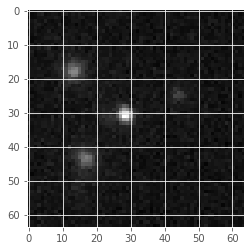

In [3]:
plt.imshow(data[100], cmap='gray')

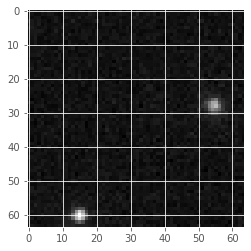

In [21]:
plt.imshow(data_ld[100], cmap='gray')

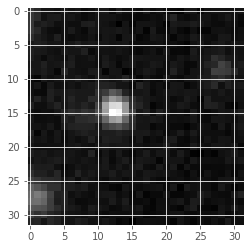

In [22]:
cropped = data[100][16:48, 16:48]
plt.imshow(cropped, cmap='gray')

tensor([[[0.0983, 0.1002, 0.0697,  ..., 0.0689, 0.0878, 0.0000],
         [0.1175, 0.0499, 0.0662,  ..., 0.0952, 0.1215, 0.0407],
         [0.0497, 0.0883, 0.0944,  ..., 0.0613, 0.0560, 0.0752],
         ...,
         [0.1191, 0.1046, 0.1041,  ..., 0.0936, 0.0749, 0.0744],
         [0.0683, 0.0634, 0.0873,  ..., 0.0797, 0.0762, 0.0555],
         [0.0531, 0.0754, 0.1094,  ..., 0.1175, 0.0928, 0.1062]]])

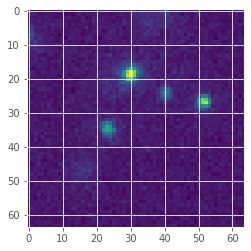

In [12]:
plt.imshow(data[1])

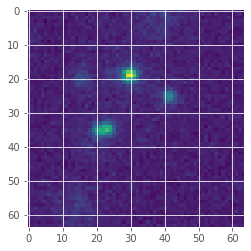

In [21]:
plt.imshow(data[0])

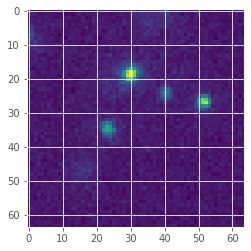

In [22]:
plt.imshow(data[1])

In [4]:
normalized_data = torch.tensor(data[1].astype(np.int16))
normalized_data = (normalized_data - normalized_data.min()) / (normalized_data.max() - normalized_data.min())
normalized_data = normalized_data.unsqueeze(0)
points = get_point_picasso(normalized_data, config_, [0])[1]
pd.DataFrame(points)

/Users/golammortuza/workspace/nam/dnam_nn/extract_location/picasso_localize.py:99: RuntimeWarning: invalid value encountered in true_divide
  ux /= unorm
/Users/golammortuza/workspace/nam/dnam_nn/extract_location/picasso_localize.py:100: RuntimeWarning: invalid value encountered in true_divide
  uy /= unorm


,0,1,2,3,4,5
0,[0],2150.003815,149.997437,0,0,11.486694
1,[0],1150.003529,199.999011,0,0,8.378784
2,[0],1850.001717,200.000477,0,0,7.896606
3,[0],1399.996471,299.999237,0,0,8.111206
4,[0],199.998546,350.001550,0,0,14.431030
5,[0],750.007057,449.994040,0,0,10.421509
6,[0],1450.004768,599.998808,0,0,8.364380
7,[0],1749.998474,699.989986,0,0,7.996338
8,[0],599.995136,700.002956,0,0,13.761963
9,[0],1049.998093,799.991369,0,0,15.514526


In [27]:
torch.tensor(cropped.astype(np.int16)).unsqueeze(0).shape

torch.Size([1, 32, 32])

In [13]:
a = torch.tensor(cropped.astype(np.int16)).unsqueeze(0).numpy()

In [16]:
pd.DataFrame(points)

,frame,x,y,photons,sx,sy,bg,lpx,lpy,net_gradient,likelihood,iterations
0,0,2.999921,50.999920,12.742310,1.517780,1.517780,0.01,0.492662,0.492662,0.235083,-12.699992,1
1,0,2.999951,23.999977,8.990356,1.708603,1.708603,0.01,0.711387,0.711387,0.475140,-8.766622,1
2,0,4.000033,54.999989,7.332031,0.010000,0.010000,0.01,0.000000,0.000000,0.283429,-7.822031,1
3,0,6.999948,35.999962,8.870239,1.089935,1.089935,0.01,0.402844,0.402844,0.347940,-9.336805,1
4,0,7.999893,26.999962,11.546143,1.887015,1.887015,0.01,0.737292,0.737292,0.294449,-10.613584,1
5,0,8.999954,17.999964,6.380371,1.811054,1.811054,0.01,0.946418,0.946418,0.271717,-6.208490,1
6,0,12.999977,32.999977,6.506592,0.010000,0.010000,0.01,0.000000,0.000000,0.300315,-6.996592,1
7,0,13.000002,12.000092,10.367065,1.968241,1.968241,0.01,0.843845,0.843845,0.314023,-9.353325,1
8,0,15.999904,25.999962,9.858643,1.972640,1.972640,0.01,0.870584,0.870584,0.206778,-8.906742,1
9,0,16.999689,41.999100,111.215576,1.323203,1.323203,0.01,0.134766,0.134766,14.715180,-109.896446,1


In [32]:
import torch
import random
mu = torch.tensor([18.8700, 22.4862])
psf = random.uniform(1, 1.5)
cov = torch.tensor([[psf * psf, 0],
                        [0, psf * psf]])
scale_tril = torch.linalg.cholesky(cov)
mul_dist = torch.distributions.multivariate_normal.MultivariateNormal(mu, scale_tril=scale_tril)

In [34]:
# %%timeit

mul_dist.sample()

tensor([16.7656, 21.6233])

In [ ]:
# 144 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

In [14]:
df = pd.read_csv("~/Desktop/imagejresult.csv")

In [3]:
df

,frame,x [nm],y [nm],sigma [nm],intensity [photon],offset [photon],bkgstd [photon],uncertainty [nm]
0,1.0,1723.023978,2182.345433,201.783646,47428.121932,2358.388206,341.263316,13.789692
1,1.0,1529.016467,6212.178046,597.294012,233266.745554,2036.737209,369.958321,26.567871
2,1.0,2412.152600,3790.779760,187.923990,161884.141568,2548.297370,580.430206,5.969769
3,1.0,3225.908257,2069.093619,165.108680,167269.797980,2648.791046,477.687193,3.692739
4,1.0,4472.272715,2744.774012,145.105409,67321.626391,2462.906522,368.912037,5.464790
...,...,...,...,...,...,...,...,...
14801,2499.0,4579.200213,2674.649801,161.530229,64213.833062,2379.373875,456.510122,8.738395
14802,2500.0,1663.285015,2070.064545,184.393039,140459.985812,2538.936571,417.242861,4.783772
14803,2500.0,2649.599397,3138.348511,136.887272,207882.242012,2644.948486,507.482814,2.185920
14804,2500.0,3731.755412,1317.816163,237.215926,132700.471855,2503.557503,438.467375,8.760366


In [15]:
count = Counter(df['frame'].tolist())
count = pd.Series(count.values())
count.describe()

count    2500.000000
mean        5.924000
std         1.739032
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        12.000000
dtype: float64

In [7]:
df_ld = pd.read_csv('~/Desktop/imagejresult_LD.csv')
count_ld = Counter(df_ld['frame'].tolist())

In [8]:
count_ld = pd.Series(count_ld.values())

In [9]:
count_ld.describe()

count    11904.00000
mean         1.44128
std          0.67560
min          1.00000
25%          1.00000
50%          1.00000
75%          2.00000
max          6.00000
dtype: float64

In [2]:
df = pd.read_csv("/Users/golammortuza/Desktop/dNAM_DNAPAINT_DriftCorrected_localizations/20190913_Recording1_locs_bin_info_5.csv")

In [3]:
df

,Binary String,intensity string,threshold,Row Shifts,Column Shifts,Fit Quality,X Position,Y Position
0,000110000010001110000010001010001001000101110010,3.444142525273074 0.0 0.0 169.22704054176728 1...,47.963217,0,0,0.850353,228.684498,505.596936
1,000100000101110100000001010010001010110110000110,0.0 0.0 0.0 32.54131870366281 3.41305056421621...,29.505190,0,0,0.879417,62.307452,83.037037
2,000110110101110100001100101111000110010000010001,0.0 14.247926167924346 8.878935995591958 75.43...,40.422215,0,0,0.723928,279.492320,262.440263
3,010011101100111101000000000000001100010011000000,0.0 199.32024730891595 6.197793288125291 5.597...,45.333463,0,0,0.777635,443.656502,179.119021
4,001001101010000100111100001111000011110000000001,0.0 0.00577176267644054 63.96727466605996 0.0 ...,53.090285,0,0,0.882668,462.507044,463.064548


In [29]:
for index, row in df.iterrows():
    new_bin_str = "".join(str(k) for k in (np.asarray([float(i) for i in row['intensity string'].split(" ")]) > row['threshold']).astype(int).tolist())
    print(row['Binary String'] == new_bin_str)
    print(new_bin_str)

True
000110000010001110000010001010001001000101110010
True
000100000101110100000001010010001010110110000110
True
000110110101110100001100101111000110010000010001
True
010011101100111101000000000000001100010011000000
True
001001101010000100111100001111000011110000000001


In [5]:
normalized_data = normalized_data.numpy()

In [7]:
normalized_data -= normalized_data.mean()

In [11]:
normalized_data = np.clip(normalized_data, 0, 1)